# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [3]:
# Shape of training dataset
x_train.shape

(50000, 32, 32, 3)

In [4]:
# Shape of test dataset
x_test.shape

(10000, 32, 32, 3)

In [5]:
# size of an image
x_train[0].shape

(32, 32, 3)

In [6]:
import numpy as np
# Number of classes
num_classes = len(np.unique(y_train))
num_classes

100

In [17]:
class_names[y_train[sample_index].item()]

'beaver'

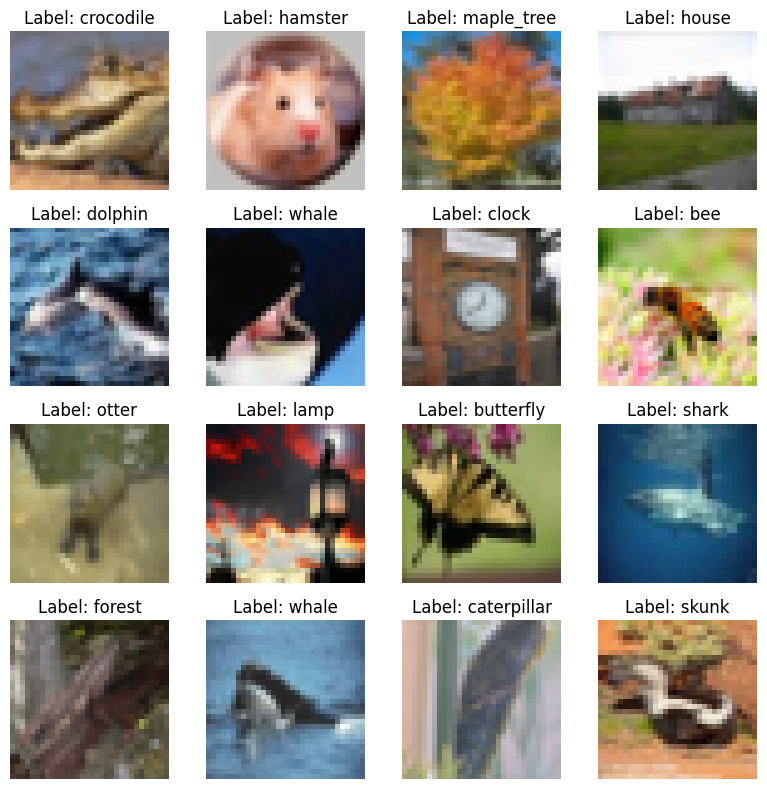

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot a few images from the training set
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

axes = axes.flatten()

for i in range(16):
    sample_index = np.random.randint(0, len(x_train))
    axes[i].imshow(x_train[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i].set_title(f"Label: {class_names[y_train[sample_index].item()]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [26]:
x_train.max()

255

In [27]:
# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split training into training and validation datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=53)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [28]:
# Create a CNN Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> adam - it adapts the learning rate for each parameter, leading to faster and more stable convergence.
- <b>Optimizer:</b> categorical_crossentropy - because we need to classify images into 100 different categories, and this loss function is designed for multi-class problems since it measures how well our predicted probabilities match the actual labels.

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [30]:
# Train the Model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0293 - loss: 4.4224 - val_accuracy: 0.1186 - val_loss: 3.7954
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.1019 - loss: 3.8493 - val_accuracy: 0.1689 - val_loss: 3.5031
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1408 - loss: 3.6013 - val_accuracy: 0.1938 - val_loss: 3.3581
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1724 - loss: 3.4429 - val_accuracy: 0.2241 - val_loss: 3.1941
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1975 - loss: 3.3077 - val_accuracy: 0.2460 - val_loss: 3.0877
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2102 - loss: 3.2233 - val_accuracy: 0.2546 - val_loss: 3.0082
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2298 - loss: 3.1191 - val_accuracy: 0.2626 - val_loss: 2.9858
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2402 - loss: 3.0557

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 32.78%
- <b>Other metric:</b> Top-5 accuracy
- <b>Reason for selection:</b> It is a good choice since we have 100 different classes. so we want to see if our model is close to the solution even if it is not 100 correct.
- <b>Value of metric:</b> 63.35%
- <b>Interpretation of metric value:</b> the top 5 accuracy is higher that th previous accuracy wich shows that often the correct label is within the 5 highest probable predictions.

In [31]:
# Model performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3399 - loss: 2.6421
Test accuracy: 0.3278000056743622
Test loss: 2.659573554992676


In [32]:
# Additional metric: Top-5 Accuracy
from keras.metrics import TopKCategoricalAccuracy
top_5_acc = TopKCategoricalAccuracy(k=5)
top_5_acc.update_state(y_test, model.predict(x_test))
print(f"Top-5 Accuracy: {top_5_acc.result().numpy():.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Top-5 Accuracy: 0.6335


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

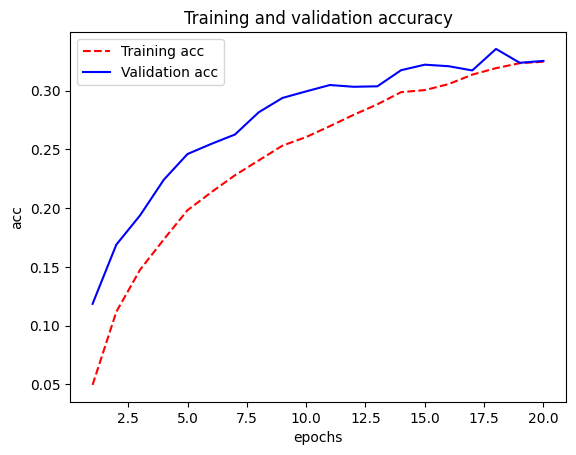

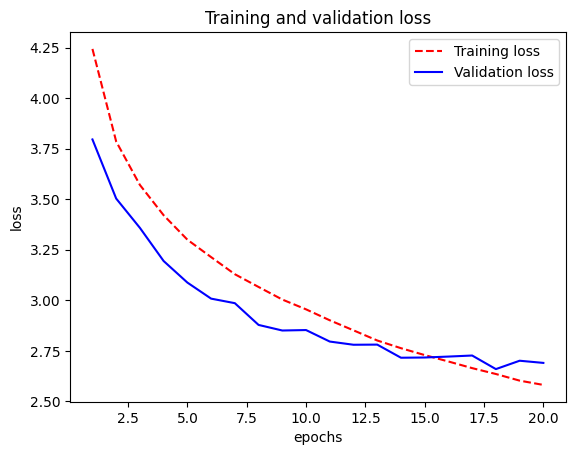

<Figure size 640x480 with 0 Axes>

In [33]:
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.figure()
plot_history(history)

The plots show the model's learning progress over time. The increasing gap between training and validation metrics suggests
overfitting occurred after around epoch 15. While training accuracy continued improving, validation performance plateaued,
indicating the model was memorizing training data rather than learning generalizable patterns.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


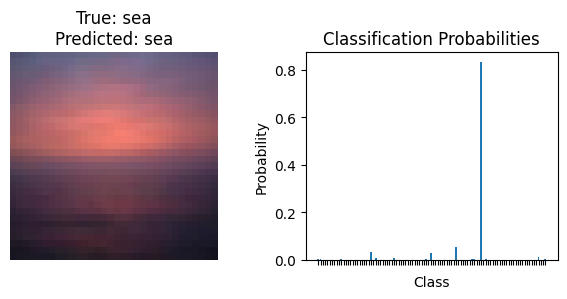

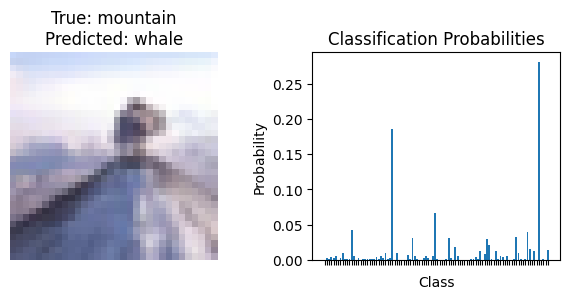

In [34]:
predictions = model.predict(x_test)

correct_index = -1
for i in range(len(x_test)):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[i])
    if predicted_class == true_class:
        correct_index = i
        break

incorrect_index = -1
for i in range(len(x_test)):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[i])
    if predicted_class != true_class:
        incorrect_index = i
        break

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f"True: {class_names[np.argmax(y_test[correct_index])]}\nPredicted: {class_names[np.argmax(predictions[correct_index])]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.bar(range(len(predictions[correct_index])), predictions[correct_index])
plt.xticks(range(len(predictions[correct_index])), [""]*len(predictions[correct_index]), rotation=90)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Classification Probabilities")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x_test[incorrect_index])
plt.title(f"True: {class_names[np.argmax(y_test[incorrect_index])]}\nPredicted: {class_names[np.argmax(predictions[incorrect_index])]}")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.bar(range(len(predictions[incorrect_index])), predictions[incorrect_index])
plt.xticks(range(len(predictions[incorrect_index])), [""]*len(predictions[incorrect_index]), rotation=90)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Classification Probabilities")

plt.tight_layout()
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [22]:
# Improve the Model
from keras.layers import BatchNormalization

# Create a CNN Model
model_improved = Sequential()
model_improved.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_improved.add(BatchNormalization())
model_improved.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Dropout(0.3))

model_improved.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_improved.add(BatchNormalization())
model_improved.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Dropout(0.3))

model_improved.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_improved.add(BatchNormalization())
model_improved.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Dropout(0.5))

model_improved.add(Flatten())
model_improved.add(Dense(512, activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(0.5))
model_improved.add(Dense(128, activation='relu'))
model_improved.add(Dropout(0.3))
model_improved.add(Dense(num_classes, activation='softmax'))

model_improved.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,418,500 (5.41 MB)

 Trainable params: 1,416,580 (5.40 MB)

 Non-trainable params: 1,920 (7.50 KB)

For improving the model's performance, I implemented several techniques:

1. Batch Normalization: which a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling

2. Deeper Architecture: Increased network depth with additional convolutional layers. This allows learning more complex features.

3. Dropout: Added dropout layers with rates 0.3-0.5 between conv blocks and dense layers to prevent overfitting. Higher dropout (0.5) used in later layers where overfitting risk is greater.

4. Dense Layer Architecture: Added an additional dense layer.

The hyperparameters were tuned through experimentation:
Dropout rates: Started at 0.5, reduced to 0.3 for earlier layers to preserve more feature information

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [23]:
# Compile the model
model_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train the Model
history_improved = model_improved.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4665 - loss: 1.9205 - val_accuracy: 0.5200 - val_loss: 1.7567
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4707 - loss: 1.9220 - val_accuracy: 0.5063 - val_loss: 1.7982
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4777 - loss: 1.8804 - val_accuracy: 0.5178 - val_loss: 1.7593
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4779 - loss: 1.8574 - val_accuracy: 0.5136 - val_loss: 1.7842
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4788 - loss: 1.8566 - val_accuracy: 0.5248 - val_loss: 1.7275
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4937 - loss: 1.8023 - val_accuracy: 0.5282 - val_loss: 1.7232
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5019 - loss: 1.8036 - val_accuracy: 0.5272 - val_loss: 1.7140
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4970 - loss: 1.80

In [34]:
# Model performance
test_loss, test_acc = model_improved.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5799 - loss: 1.5538
Test accuracy: 0.5709999799728394
Test loss: 1.5494282245635986


In [35]:
# Additional metric: Top-5 Accuracy
from keras.metrics import TopKCategoricalAccuracy
top_5_acc = TopKCategoricalAccuracy(k=5)
top_5_acc.update_state(y_test, model.predict(x_test))
print(f"Top-5 Accuracy: {top_5_acc.result().numpy():.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Top-5 Accuracy: 0.6346


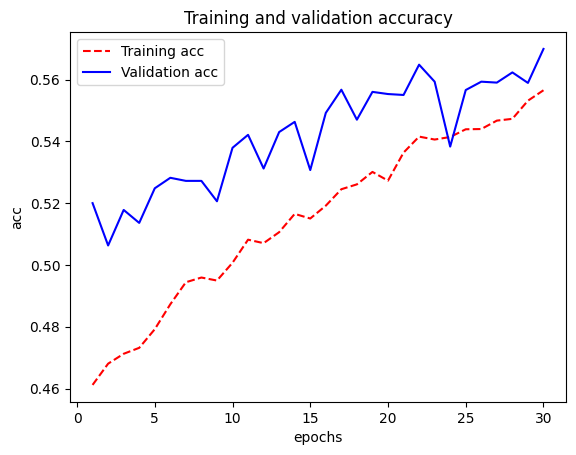

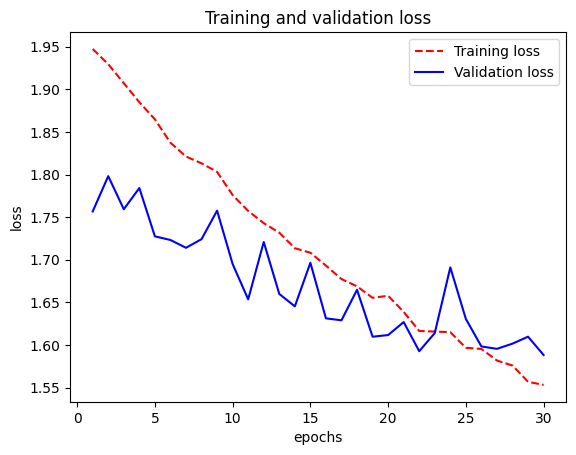

<Figure size 640x480 with 0 Axes>

In [36]:
plot_history(history_improved)

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Based on the training plots and evaluation metrics, the enhanced model showed significant improvement over the baseline model. The test accuracy increased and the model exhibited less overfitting, with the validation accuracy more closely tracking the training accuracy.

The improvements likely stem from several architectural changes:
1. Adding batch normalization helped stabilize training
2. Using dropout layers reduced overfitting
3. The additional convolutional layers allowed the model to learn more complex features

There is still room for improvement. The model could benefit from:
- Data augmentation to artificially expand the training set
- Learning rate scheduling to fine-tune optimization

Future techniques to explore include:
- Transfer learning using pre-trained models

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.